<a href="https://colab.research.google.com/github/NourhanTamer20/DiabetesPrediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

Read Dataset

In [2]:
diabetes = ('/content/diabetes.csv')
dataset = pd.read_csv(diabetes)

In [14]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Data Preprocessing**

In [29]:
##Check For Null Values in training dataset
pd.isnull(dataset).sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
dataset.duplicated().sum() ## Will give us a number of duplicates

dataset.drop_duplicates(inplace = True)

In [12]:
c = np.corrcoef(dataset['Outcome'],dataset['Pregnancies'])
print('Correlations between Outcome and Pregnancies\n',c)

Correlations between Outcome and Pregnancies
 [[1.         0.22189815]
 [0.22189815 1.        ]]


In [13]:
c = np.corrcoef(dataset['Outcome'],dataset['SkinThickness'])
print('Correlations between Outcome and Pregnancies\n',c)

Correlations between Outcome and Pregnancies
 [[1.         0.07475223]
 [0.07475223 1.        ]]


In [50]:
## All atributes are needed!
##Cannot drop any column

In [10]:
#0 represents healthy 1 represents diabetic
# The distribution of the Outcome variable was examined.
dataset["Outcome"].value_counts()*100/len(dataset)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [11]:
# The classes of the outcome variable were examined.
dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: ylabel='Outcome'>

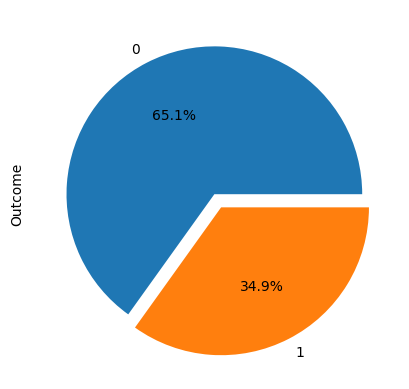

In [25]:
# The distribution of the outcome variable in the data was examined and visualized.
#dataset.groupby(['Outcome']).sum().plot(kind='pie', y='')

dataset['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')

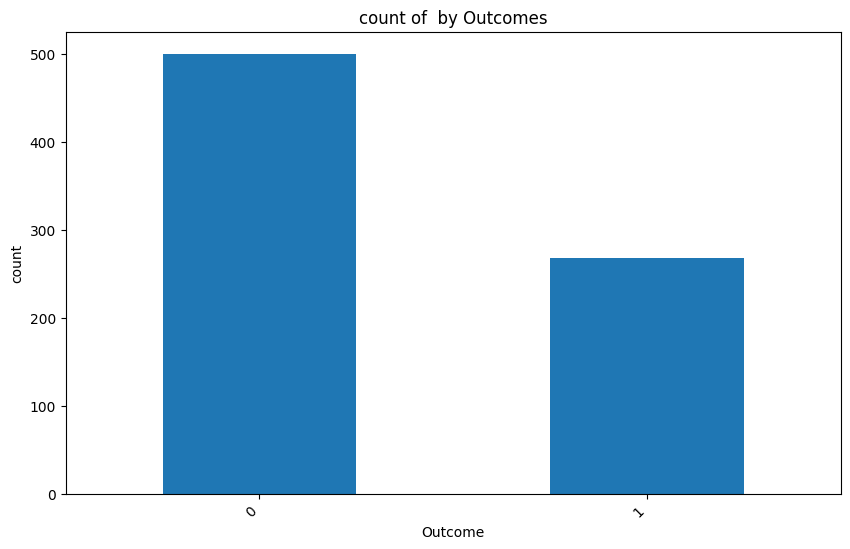

In [26]:
plt.figure(figsize=(10, 6))
Outcome= dataset["Outcome"].value_counts()
Outcome.plot(kind="bar")
plt.xlabel("Outcome")
plt.ylabel("count")
plt.title("count of  by Outcomes")
plt.xticks(rotation=45, ha='right')
plt.show()

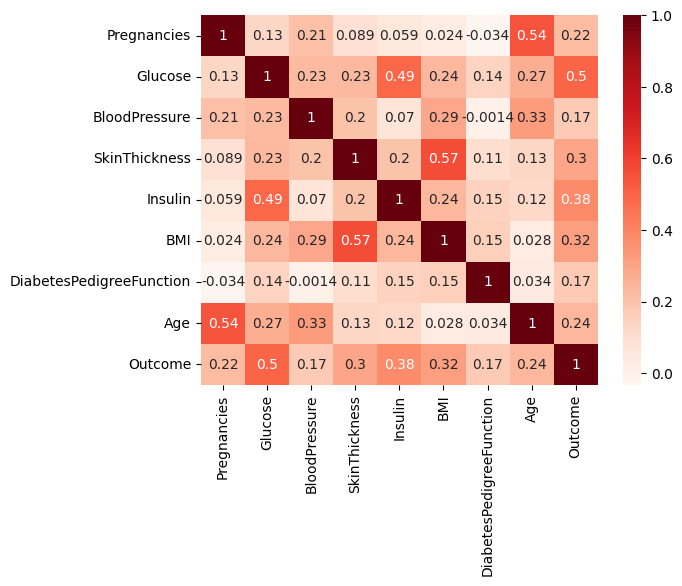

In [56]:
sns.heatmap(dataset.corr(), annot=True,  cmap = "Reds" )
plt.show()

In [51]:
### Replacing zero values with NaN

dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [31]:
dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [32]:
# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):
    temp = dataset[dataset[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = dataset.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    dataset.loc[(dataset['Outcome'] == 0 ) & (dataset[i].isnull()), i] = median_target(i)[i][0]
    dataset.loc[(dataset['Outcome'] == 1 ) & (dataset[i].isnull()), i] = median_target(i)[i][1]

In [33]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1


In [34]:
##Check for any null values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [35]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset.iloc[:, [1, 4, 5, 7]].values
Y = dataset.iloc[:, 8].values

In [36]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset['Outcome'])

In [37]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [42]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)

In [47]:
import sklearn.metrics as metrics
precision = precision_score(Y_test, Y_pred_logreg, average='weighted')
recall = recall_score(Y_test, Y_pred_logreg, average='weighted')
accuracy = accuracy_score(Y_test, Y_pred_logreg)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.7289513207880556
Recall: 0.7337662337662337
Accuracy: 0.7337662337662337


In [48]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_logreg)
cm

array([[82, 18],
       [23, 31]])

In [49]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_logreg))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       100
           1       0.63      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

